## Classification with KNN

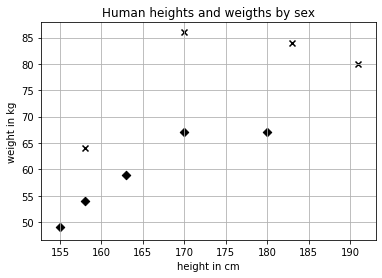

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([[158, 64], [170, 86], [183, 84], [191, 80], [155, 49], [163, 59], [180, 67], [158, 54], [170, 67]])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human heights and weigths by sex')
plt.xlabel('height in cm')
plt.ylabel('weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')

plt.grid(True)
plt.show()

In [4]:
x = np.array([[155, 70]])
distances = np.sqrt(np.sum((X_train - x) ** 2, axis = 1))
distances

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [6]:
nearest_neighbor_indices = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
nearest_neighbor_genders

array(['male', 'female', 'female'], dtype='<U6')

In [8]:
from collections import Counter
b = Counter(np.take(y_train, nearest_neighbor_indices))
b.most_common(1)[0][0]

'female'

## Implement a KNN classifier using scikit-learn

In [10]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [14]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train_binarized.reshape(-1))
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1))[0]
prediction_label = lb.inverse_transform(prediction_binarized)
prediction_label

array(['female'], dtype='<U6')

## Evaluate perfromance of classifier

In [22]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
predictions_binarized = clf.predict(X_test)
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))

Predicted labels: ['female' 'male' 'female' 'female']


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
print('Accuracy: %s' % accuracy_score(y_test_binarized, predictions_binarized))
print('Precision: %s' % precision_score(y_test_binarized, predictions_binarized))
print('Recall: %s' % recall_score(y_test_binarized, predictions_binarized))
print('F1 score: %s' % f1_score(y_test_binarized, predictions_binarized))
print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized, predictions_binarized))

Accuracy: 0.75
Precision: 1.0
Recall: 0.5
F1 score: 0.6666666666666666
Matthews correlation coefficient: 0.5773502691896258


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized, target_names=['male'], labels=[1]))

              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2



## Regression with KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train = np.array([[158, 1], [170, 1], [183, 1], [191, 1], [155, 0], [163, 0], [180, 0], [158, 0], [170, 0]])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([[168, 1], [180, 1], [160, 0], [169, 0]])
y_test = [65, 96, 52, 67]

K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print('Predicted weights: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test, predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test, predictions))
print('Mean squared error: %s' % mean_squared_error(y_test, predictions))

Predicted weights: [70.66666667 79.         59.         70.66666667]
Coefficient of determination: 0.6290565226735438
Mean absolute error: 8.333333333333336
Mean squared error: 95.8888888888889


## Scaling features

In [36]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
print(X_train)
print(X_train_scaled)

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]


In [37]:
X_test_scaled = ss.transform(X_test)
clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)

print('Predicted weights: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test, predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test, predictions))
print('Mean squared error: %s' % mean_squared_error(y_test, predictions))

Predicted weights: [78.         83.33333333 54.         64.33333333]
Coefficient of determination: 0.6706425961745109
Mean absolute error: 7.583333333333336
Mean squared error: 85.13888888888893
